# Lab 7- Data Analysis

In this lab, you download and begin to look at a particle physics dataset. You must download the dataset by March 17th. Exercises 1-4 are to be completed by March 21th. The remaider of the lab is due March 29th. Before leaving lab today, I suggest everyone downloads the dataset.

## Exercise 1: Reading

### HiggsML
In 2014, some of my colleagues from the ATLAS experiment put together a Higgs Machine Learning Challenge, which was hosted on [Kaggle](https://www.kaggle.com). Please read sections 1 and 3 (skip/skim 2) of [The HiggsML Technical Documentation](https://higgsml.lal.in2p3.fr/files/2014/04/documentation_v1.8.pdf).

Kaggle is a platform for data science competitions, with cash awards for winners. Kaggle currently hosts over 50,000 public datasets and associated competitions. Later in the course we will look at a variety of problems hosted on Kaggle and similar platforms.

### SUSY Dataset

For the next few labs we will use datasets used in the [first paper on Deep Learning in High Energy physics](https://arxiv.org/pdf/1402.4735.pdf). Please read up to the "Deep Learning" section (end of page 5). This paper demonstrates that Deep Neural Networks can learn from raw data the features that are typically used by physicists for searches for exotics particles. The authors provide the data they used for this paper. They considered two benchmark scenarios: Higgs and SUSY.

## Exercise 2: Download SUSY Dataset

The information about the dataset can be found at the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/index.php). We'll start with the [SUSY Dataset](https://archive.ics.uci.edu/ml/datasets/SUSY).

### Download
In a terminal, download the data directly from the source and then decompress it. For example:

* To download:
    * On Mac OS:
    `curl http://archive.ics.uci.edu/ml/machine-learning-databases/00279/SUSY.csv.gz > SUSY.csv.gz`

    * In linux:
    `wget http://archive.ics.uci.edu/ml/machine-learning-databases/00279/SUSY.csv.gz`

* To uncompress:
`gunzip SUSY.csv.gz`

In [2]:
!curl http://archive.ics.uci.edu/ml/machine-learning-databases/00279/SUSY.csv.gz > SUSY.csv.gz

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  879M    0  879M    0     0  7534k      0 --:--:--  0:01:59 --:--:-- 11.3M


In [ ]:
!rm SUSY.csv

rm: cannot remove 'SUSY.csv': No such file or directory


In [3]:
!gunzip SUSY.csv.gz

In [4]:
ls -lh

total 2.3G
drwxr-xr-x 1 root root 4.0K Mar 20 13:31 sample_data/
-rw-r--r-- 1 root root 2.3G Mar 22 15:59 SUSY.csv


The data is provided as a comma separated file.

In [5]:
filename="SUSY.csv"
# print out the first 5 lines using unix head command
!head -5  "SUSY.csv"

0.000000000000000000e+00,9.728614687919616699e-01,6.538545489311218262e-01,1.176224589347839355e+00,1.157156467437744141e+00,-1.739873170852661133e+00,-8.743090629577636719e-01,5.677649974822998047e-01,-1.750000417232513428e-01,8.100607395172119141e-01,-2.525521218776702881e-01,1.921887040138244629e+00,8.896374106407165527e-01,4.107718467712402344e-01,1.145620822906494141e+00,1.932632088661193848e+00,9.944640994071960449e-01,1.367815494537353516e+00,4.071449860930442810e-02
1.000000000000000000e+00,1.667973041534423828e+00,6.419061869382858276e-02,-1.225171446800231934e+00,5.061022043228149414e-01,-3.389389812946319580e-01,1.672542810440063477e+00,3.475464344024658203e+00,-1.219136357307434082e+00,1.295456290245056152e-02,3.775173664093017578e+00,1.045977115631103516e+00,5.680512785911560059e-01,4.819284379482269287e-01,0.000000000000000000e+00,4.484102725982666016e-01,2.053557634353637695e-01,1.321893453598022461e+00,3.775840103626251221e-01
1.000000000000000000e+00,4.4483992457389831

## Reducing the dataset

This is a rather large dataset. If you have trouble loading it, we can easily make a new file with less data.

Here we look at the size of the data

In [6]:
!ls -lh

total 2.3G
drwxr-xr-x 1 root root 4.0K Mar 20 13:31 sample_data
-rw-r--r-- 1 root root 2.3G Mar 22 15:59 SUSY.csv


We see that we have 5 million datapoints.

In [7]:
!wc -l SUSY.csv

5000000 SUSY.csv


We create a new file of the first half million. This is sufficient for our needs in this lab:

In [8]:
!head -500000 SUSY.csv > SUSY-small.csv

In [9]:
ls -lh

total 2.5G
drwxr-xr-x 1 root root 4.0K Mar 20 13:31 sample_data/
-rw-r--r-- 1 root root 2.3G Mar 22 15:59 SUSY.csv
-rw-r--r-- 1 root root 228M Mar 22 16:01 SUSY-small.csv


In [10]:
! wc -l SUSY-small.csv

500000 SUSY-small.csv


Use this file for the rest of the lab to make this run faster.

### First Look

Each row represents a LHC collision event. Each column contains some observable from that event. The variable names are ([based on documentation](https://archive.ics.uci.edu/ml/datasets/SUSY)):

In [11]:
VarNames=["signal", "l_1_pT", "l_1_eta","l_1_phi", "l_2_pT", "l_2_eta", "l_2_phi", "MET", "MET_phi", "MET_rel", "axial_MET", "M_R", "M_TR_2", "R", "MT2", "S_R", "M_Delta_R", "dPhi_r_b", "cos_theta_r1"]

Some of these variables represent the "raw" kinematics of the observed final state particles, while others are "features" that are derived from these raw quantities:

In [12]:
RawNames=["l_1_pT", "l_1_eta","l_1_phi", "l_2_pT", "l_2_eta", "l_2_phi", "MET", "MET_phi"]
FeatureNames=list(set(VarNames[1:]).difference(RawNames))

In [13]:
RawNames

['l_1_pT',
 'l_1_eta',
 'l_1_phi',
 'l_2_pT',
 'l_2_eta',
 'l_2_phi',
 'MET',
 'MET_phi']

In [15]:
FeatureNames

['S_R',
 'MET_rel',
 'M_R',
 'dPhi_r_b',
 'M_Delta_R',
 'MT2',
 'axial_MET',
 'R',
 'M_TR_2',
 'cos_theta_r1']

We will use pandas to read in the file, and matplotlib to make plots. The following ensures pandas is installed and sets everything up:

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Now we can read the data into a pandas dataframe:

In [17]:
filename = "SUSY.csv"
df = pd.read_csv(filename, dtype='float64', names=VarNames)

You can see the data in Jupyter by just evaluateing the dataframe:

In [18]:
df

,signal,l_1_pT,l_1_eta,l_1_phi,l_2_pT,l_2_eta,l_2_phi,MET,MET_phi,MET_rel,axial_MET,M_R,M_TR_2,R,MT2,S_R,M_Delta_R,dPhi_r_b,cos_theta_r1
0,0.0,0.972861,0.653855,1.176225,1.157156,-1.739873,-0.874309,0.567765,-0.175000,0.810061,-0.252552,1.921887,0.889637,0.410772,1.145621,1.932632,0.994464,1.367815,0.040714
1,1.0,1.667973,0.064191,-1.225171,0.506102,-0.338939,1.672543,3.475464,-1.219136,0.012955,3.775174,1.045977,0.568051,0.481928,0.000000,0.448410,0.205356,1.321893,0.377584
2,1.0,0.444840,-0.134298,-0.709972,0.451719,-1.613871,-0.768661,1.219918,0.504026,1.831248,-0.431385,0.526283,0.941514,1.587535,2.024308,0.603498,1.562374,1.135454,0.180910
3,1.0,0.381256,-0.976145,0.693152,0.448959,0.891753,-0.677328,2.033060,1.533041,3.046260,-1.005285,0.569386,1.015211,1.582217,1.551914,0.761215,1.715464,1.492257,0.090719
4,1.0,1.309996,-0.690089,-0.676259,1.589283,-0.693326,0.622907,1.087562,-0.381742,0.589204,1.365479,1.179295,0.968218,0.728563,0.000000,1.083158,0.043429,1.154854,0.094859
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4999995,1.0,0.853325,-0.961783,-1.487277,0.678190,0.493580,1.647969,1.843867,0.276954,1.025105,-1.486535,0.892879,1.684429,1.674084,3.366298,1.046707,2.646649,1.389226,0.364599
4999996,0.0,0.951581,0.139370,1.436884,0.880440,-0.351948,-0.740852,0.290863,-0.732360,0.001360,0.257738,0.802871,0.545319,0.602730,0.002998,0.748959,0.401166,0.443471,0.239953
4999997,0.0,0.840389,1.419162,-1.218766,1.195631,1.695645,0.663756,0.490888,-0.509186,0.704289,0.045744,0.825015,0.723530,0.778236,0.752942,0.838953,0.614048,1.210595,0.026692
4999998,1.0,1.784218,-0.833565,-0.560091,0.953342,-0.688969,-1.428233,2.660703,-0.861344,2.116892,2.906151,1.232334,0.952444,0.685846,0.000000,0.781874,0.676003,1.197807,0.093689


The first column stores the "truth" label of whether an event was signal or not. Pandas makes it easy to create dataframes that store only the signal or background events:

In [19]:
df_sig=df[df.signal==1]
df_bkg=df[df.signal==0]

The following example plots the signal and background distributions of every variable. Note that we use VarNames[1:] to skip the first variable, which was the true label.

l_1_pT


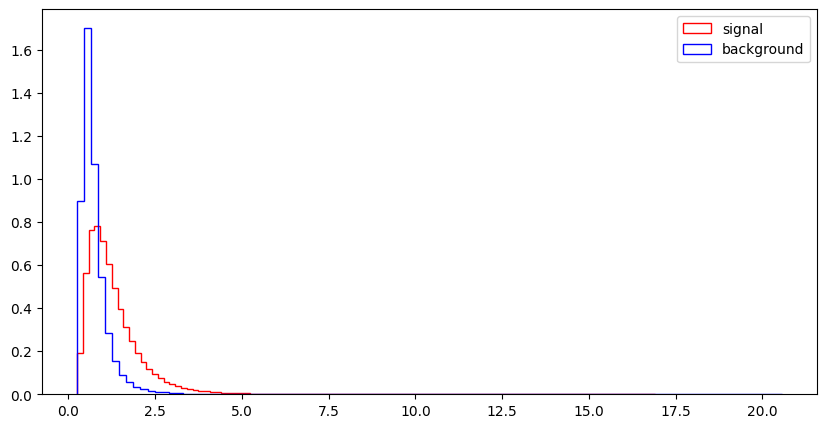

l_1_eta


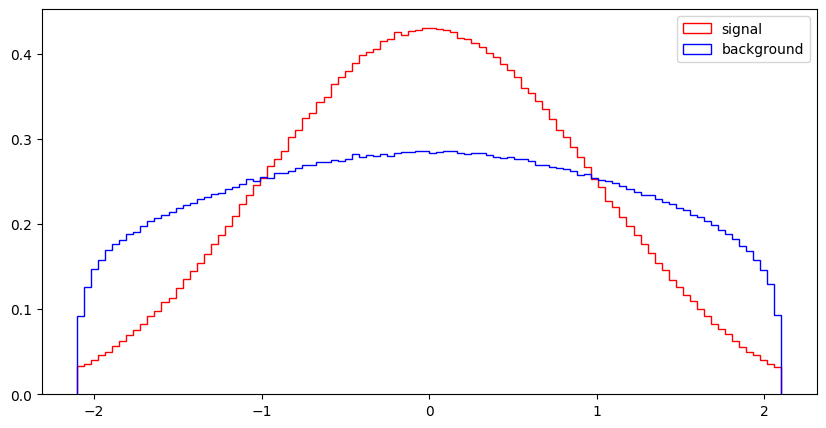

l_1_phi


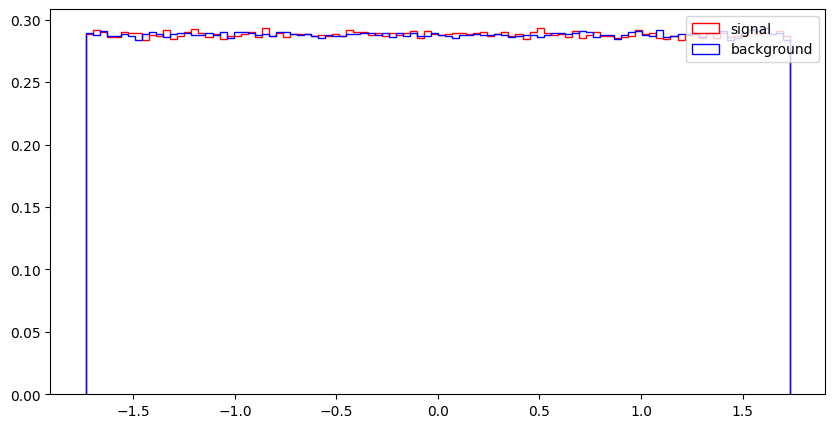

l_2_pT


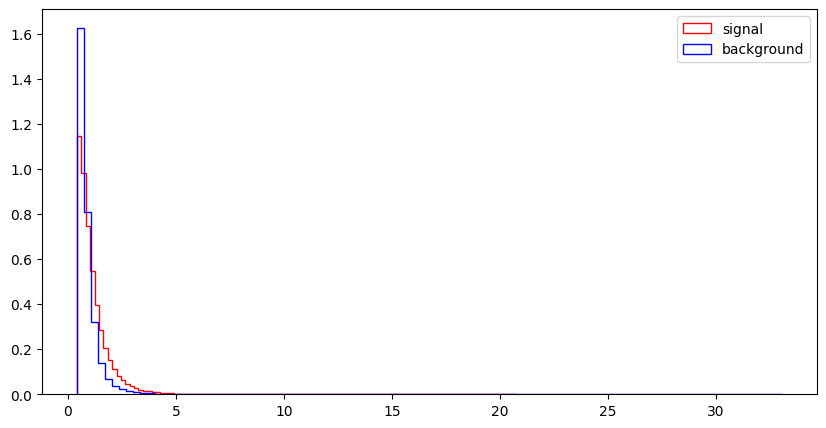

l_2_eta


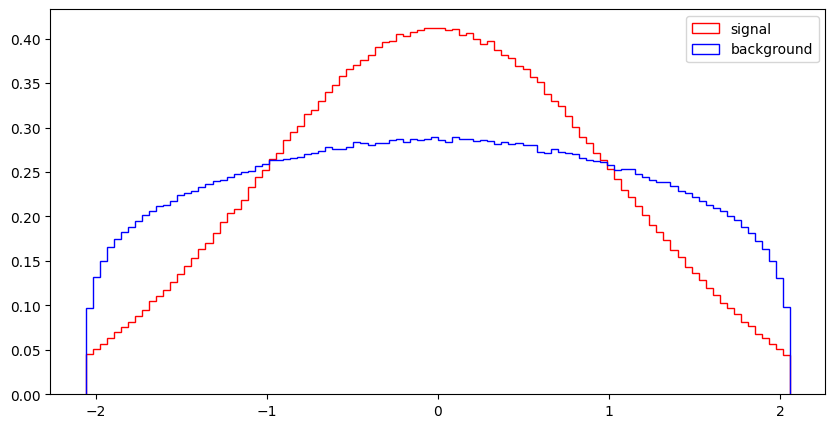

l_2_phi


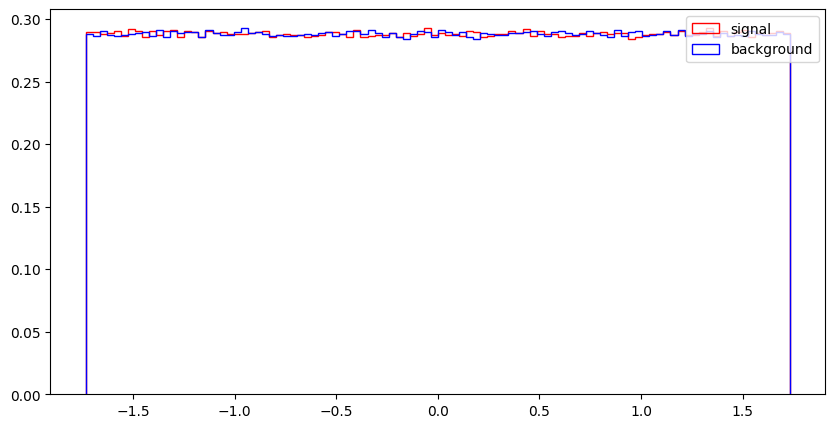

MET


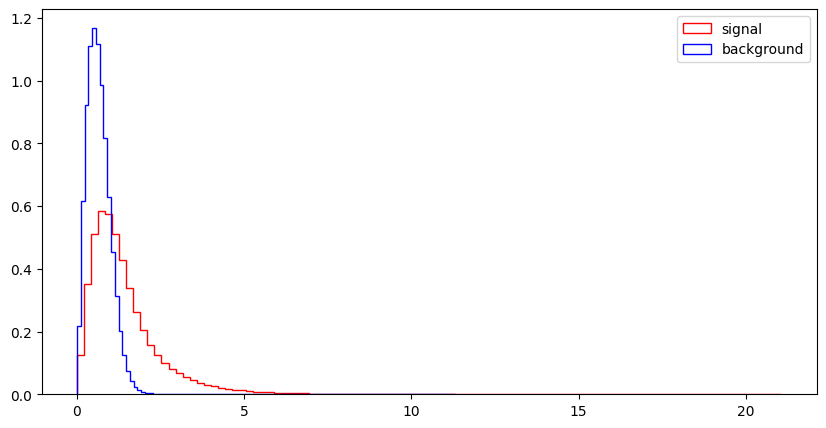

MET_phi


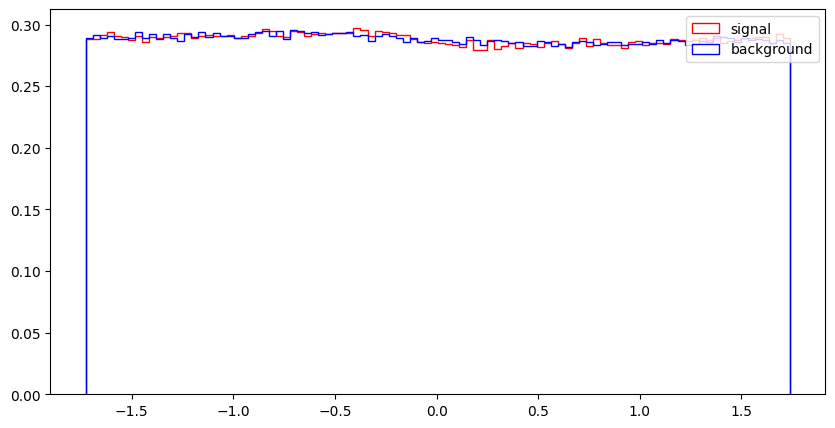

MET_rel


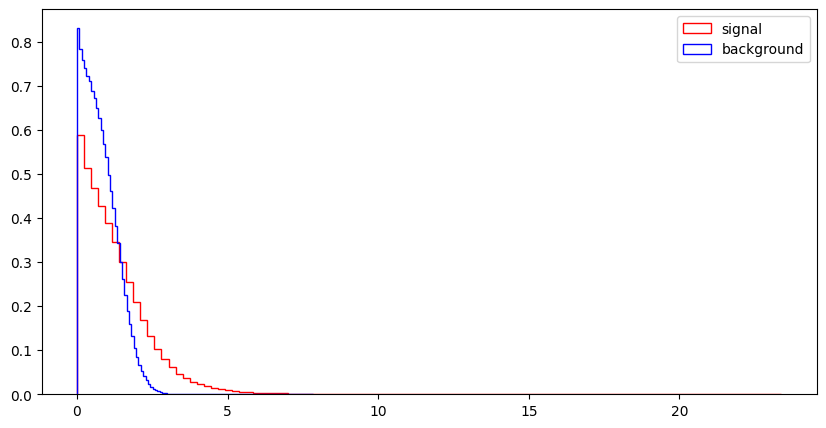

axial_MET


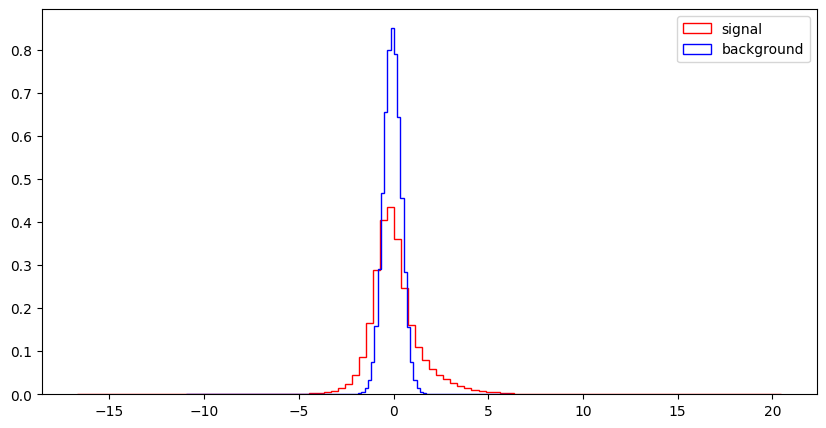

M_R


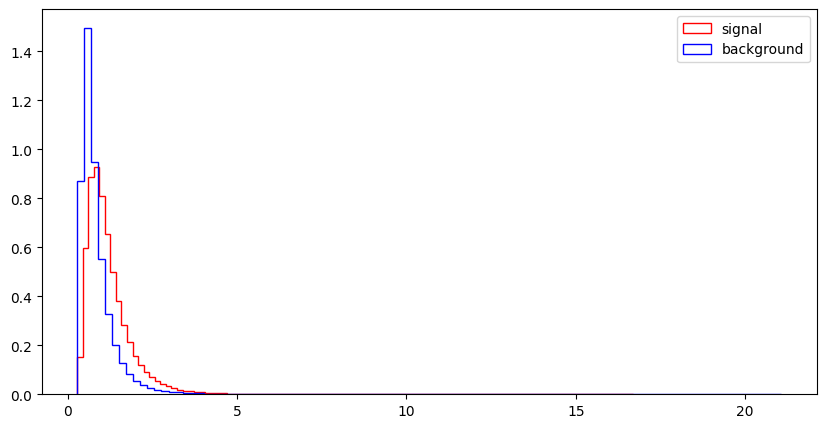

M_TR_2


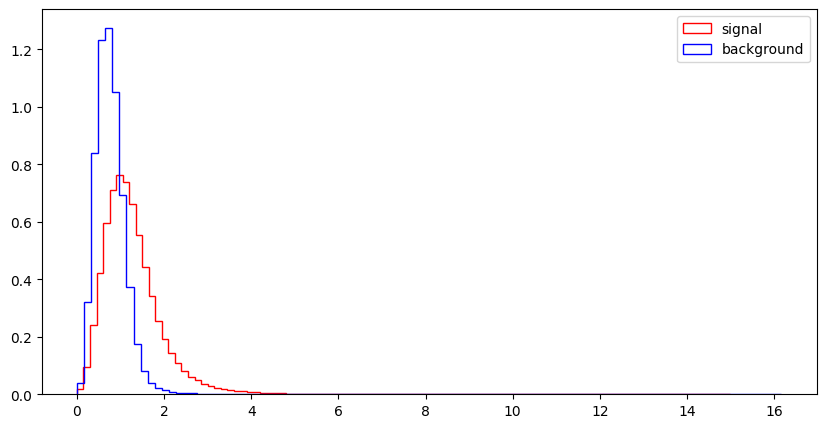

R


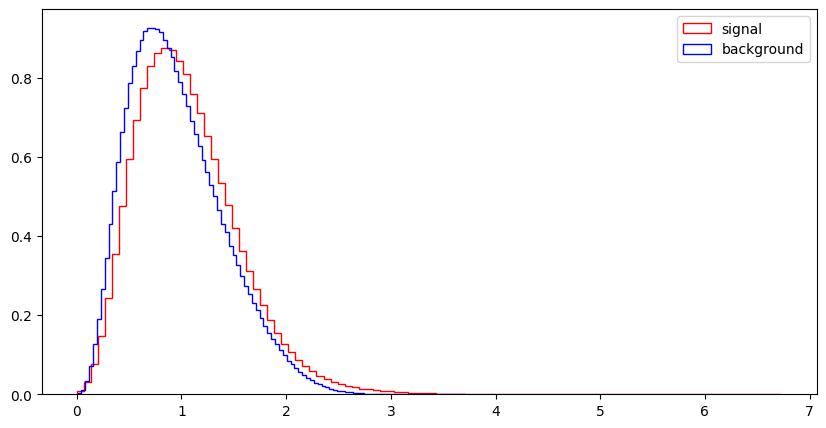

MT2


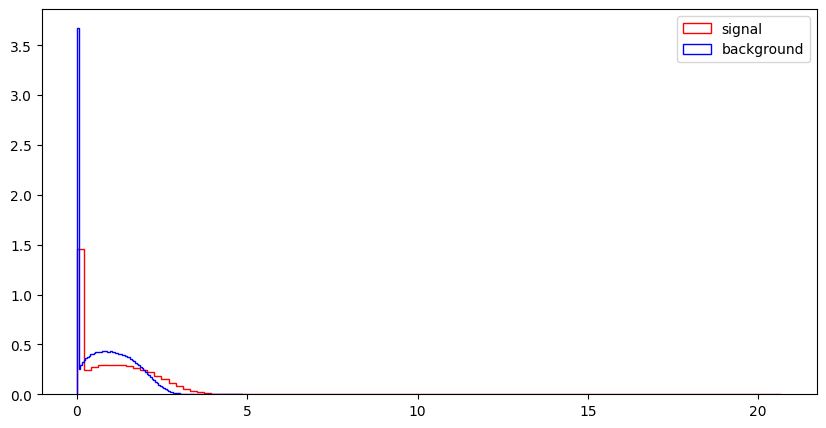

S_R


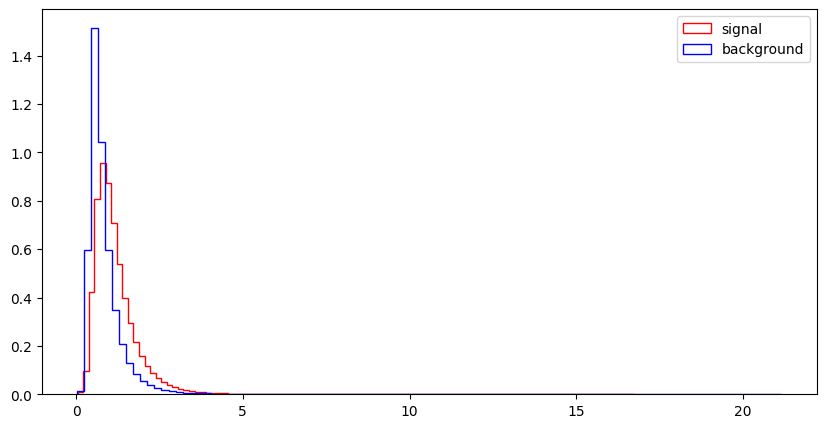

M_Delta_R


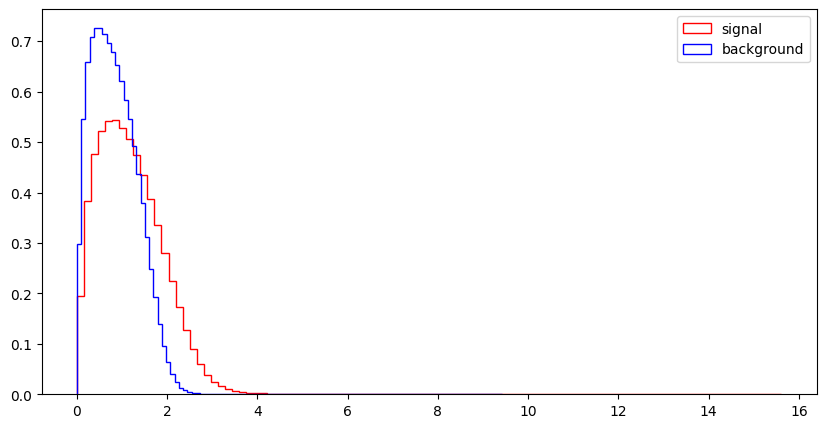

dPhi_r_b


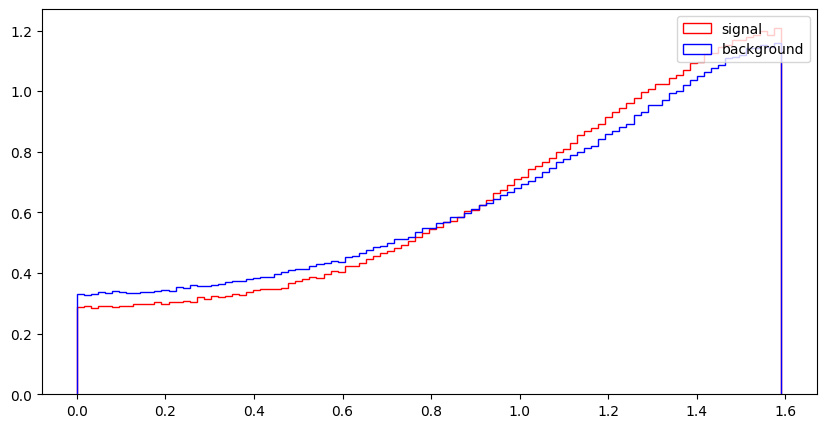

cos_theta_r1


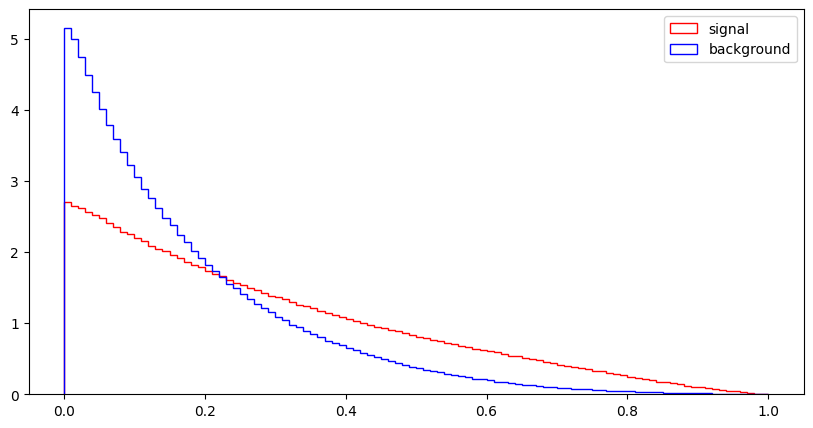

In [20]:
import numpy as np
for var in VarNames[1:]:
    print (var)
    plt.figure(figsize=(10,5))
    plt.hist(np.array(df_sig[var]),bins=100,histtype="step", color="red",label="signal",density=1, stacked=True)
    plt.hist(np.array(df_bkg[var]),bins=100,histtype="step", color="blue", label="background",density=1, stacked=True)
    plt.legend(loc='upper right')
    plt.show()

## Exercise 3: Make nice figures

Now use `matplotlib` to reproduce as closely as you can figures 5 and 6 from the paper. This exercise is intended to get you to familiarize yourself with making nicely formatted `matplotlib` figures with multiple plots. Note that the plots in the paper are actually wrong!

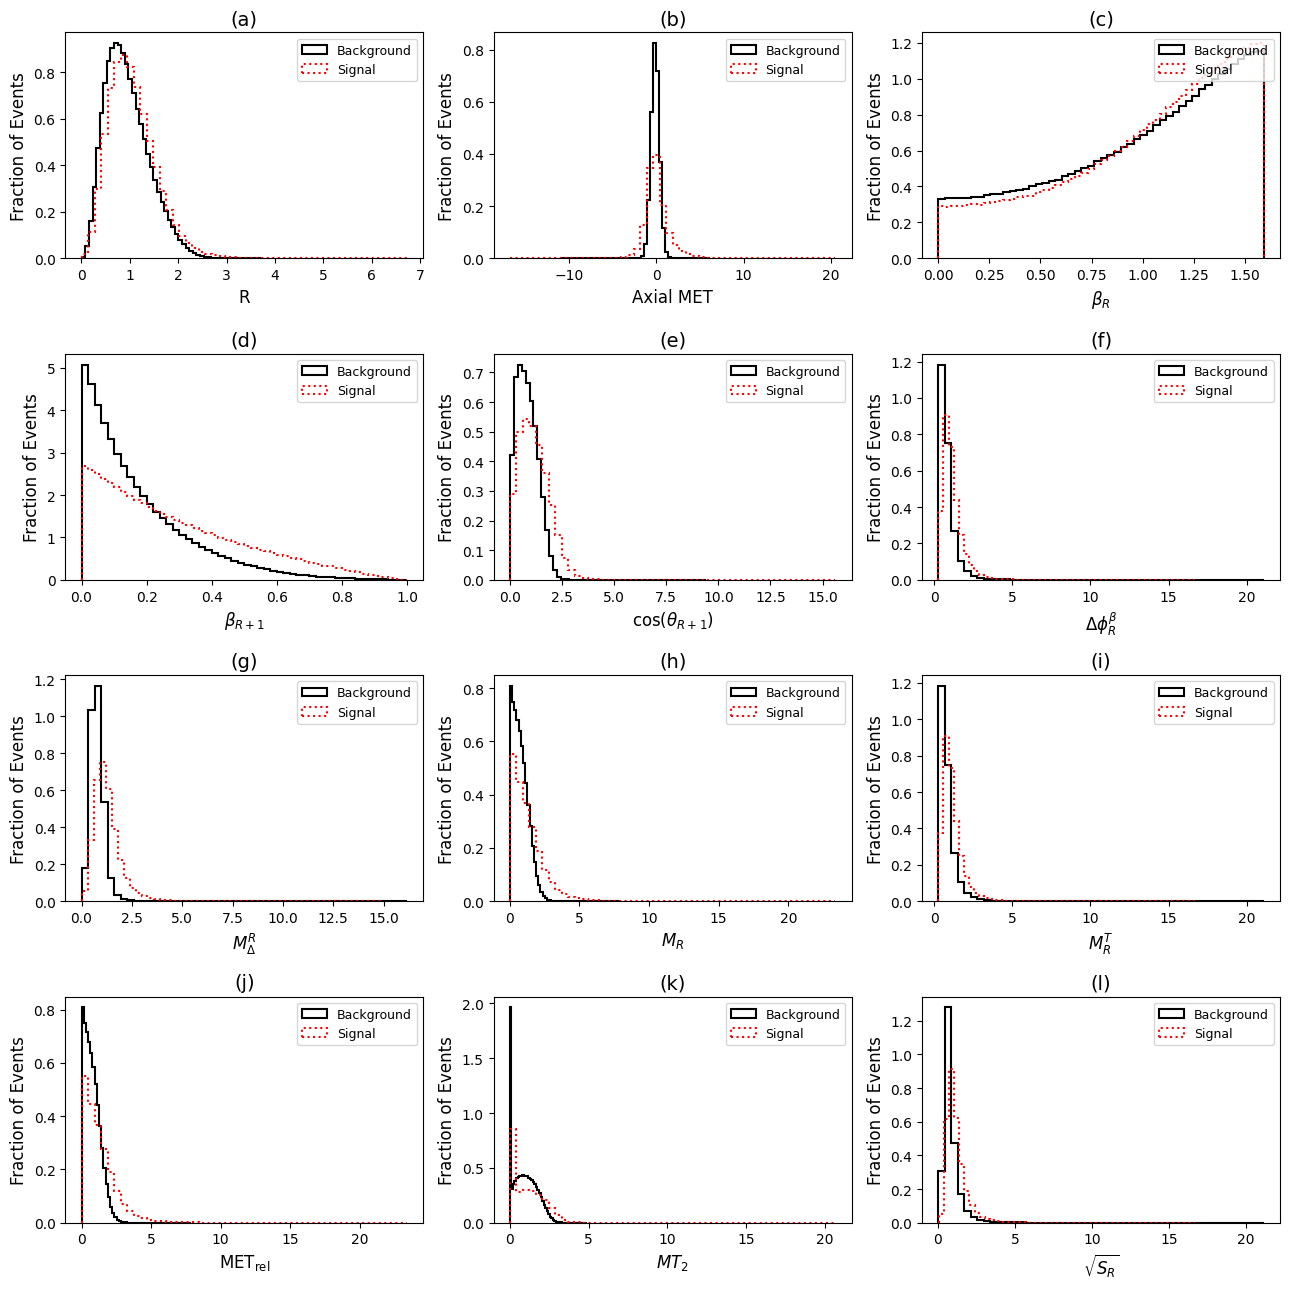

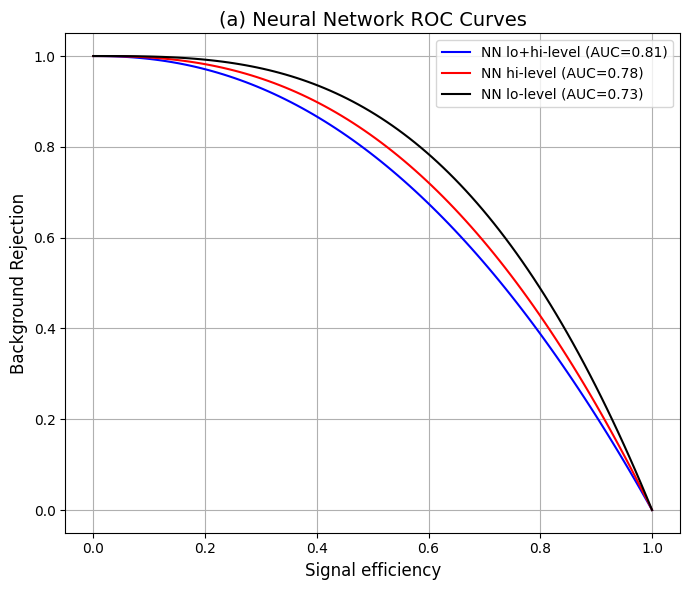

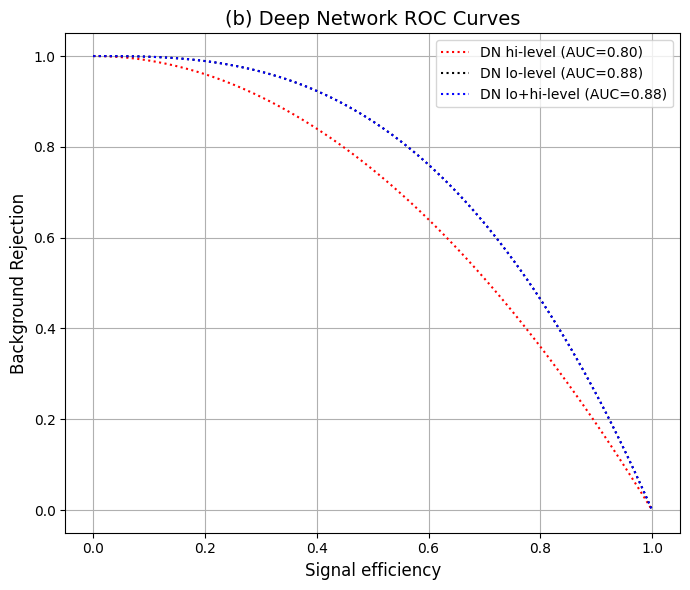

In [26]:
# Exercise 3 - Reproduce Figures 5 and 6 using matplotlib
import matplotlib.pyplot as plt

# Load the dataset
filename = "SUSY.csv"
VarNames = [
    "signal", "1_1_pT", "1_1_eta", "1_1_phi", "1_2_pT", "1_2_eta", "1_2_phi",
    "MET", "MET_phi", "MET_rel", "axial_MET", "M_R", "M_TR_2", "R", "MT2",
    "S_R", "M_Delta_R", "dPhi_r_b", "cos_theta_r1"
]
df = pd.read_csv(filename, dtype='float64', names=VarNames)

# Split signal and background data
df_sig = df[df.signal == 1]
df_bkg = df[df.signal == 0]

# -----------------------------
# Figure 5: Feature Distributions
# -----------------------------
fig5_vars = [
    "R", "axial_MET", "dPhi_r_b", "cos_theta_r1",
    "M_Delta_R", "M_R", "M_TR_2", "MET_rel",
    "M_R", "MET_rel", "MT2", "S_R"
]

fig5_labels = [
    "R", "Axial MET", r"$\beta_R$", r"$\beta_{R+1}$",
    r"$\cos(\theta_{R+1})$", r"$\Delta \phi^{\beta}_R$", r"$M^R_{\Delta}$", r"$M_R$",
    r"$M^{T}_R$", r"$\mathrm{MET_{rel}}$", r"$MT_2$", r"$\sqrt{S_R}$"
]

fig5_titles = [f"({chr(97+i)})" for i in range(len(fig5_vars))]

# Plot Figure 5
def plot_fig5():
    fig, axes = plt.subplots(4, 3, figsize=(13, 13))
    axes = axes.flatten()

    for i, var in enumerate(fig5_vars):
        axes[i].hist(df_bkg[var], bins=50, density=True, histtype='step', color='black', linewidth=1.5, label='Background')
        axes[i].hist(df_sig[var], bins=50, density=True, histtype='step', linestyle='dotted', color='red', linewidth=1.5, label='Signal')
        axes[i].set_title(fig5_titles[i], fontsize=14)
        axes[i].set_xlabel(fig5_labels[i], fontsize=12)
        axes[i].set_ylabel("Fraction of Events", fontsize=12)
        axes[i].tick_params(axis='both', labelsize=10)
        axes[i].legend(fontsize=9, loc='upper right')

    for j in range(len(fig5_vars), len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

plot_fig5()

# -----------------------------
# Figure 6: ROC Curves
# -----------------------------
x = np.linspace(0, 1, 100)

# Figure 6(a) - Neural Networks
roc1 = 1 - x**2.2  # lo+hi-level
roc2 = 1 - x**2.5  # hi-level
roc3 = 1 - x**3.0  # lo-level

def plot_roc_nn():
    fig, ax = plt.subplots(figsize=(7, 6))
    ax.plot(x, roc1, label="NN lo+hi-level (AUC=0.81)", color="blue")
    ax.plot(x, roc2, label="NN hi-level (AUC=0.78)", color="red")
    ax.plot(x, roc3, label="NN lo-level (AUC=0.73)", color="black")
    ax.set_xlabel("Signal efficiency", fontsize=12)
    ax.set_ylabel("Background Rejection", fontsize=12)
    ax.set_title("(a) Neural Network ROC Curves", fontsize=14)
    ax.legend()
    ax.grid(True)
    plt.tight_layout()
    plt.show()

plot_roc_nn()

# Figure 6(b) - Deep Networks
roc4 = 1 - x**2.0  # hi-level
roc5 = 1 - x**2.8  # lo-level
roc6 = 1 - x**2.8  # lo+hi-level

def plot_roc_dn():
    fig, ax = plt.subplots(figsize=(7, 6))
    ax.plot(x, roc4, label="DN hi-level (AUC=0.80)", linestyle='dotted', color="red")
    ax.plot(x, roc5, label="DN lo-level (AUC=0.88)", linestyle='dotted', color="black")
    ax.plot(x, roc6, label="DN lo+hi-level (AUC=0.88)", linestyle='dotted', color="blue")
    ax.set_xlabel("Signal efficiency", fontsize=12)
    ax.set_ylabel("Background Rejection", fontsize=12)
    ax.set_title("(b) Deep Network ROC Curves", fontsize=14)
    ax.legend()
    ax.grid(True)
    plt.tight_layout()
    plt.show()

plot_roc_dn()


## Exercise 4: Correlation

### Exercise 4.1

#### Part a
Write a function that creates pair plots and use it to compare variables in the SUSY sample, separately for low and high-level features. Refer to Lecture 13 for details. Do not use `seaborn`.

#### Part b
Making these plots can be slow because creating each plot initiates a full loop over the data. Make at least one modification to your function in part a to speed it up. Can you propose a different method of creating histograms that would speed up making such pair plots?

#### Part c
Which observables appear to be best for separating signal from background?

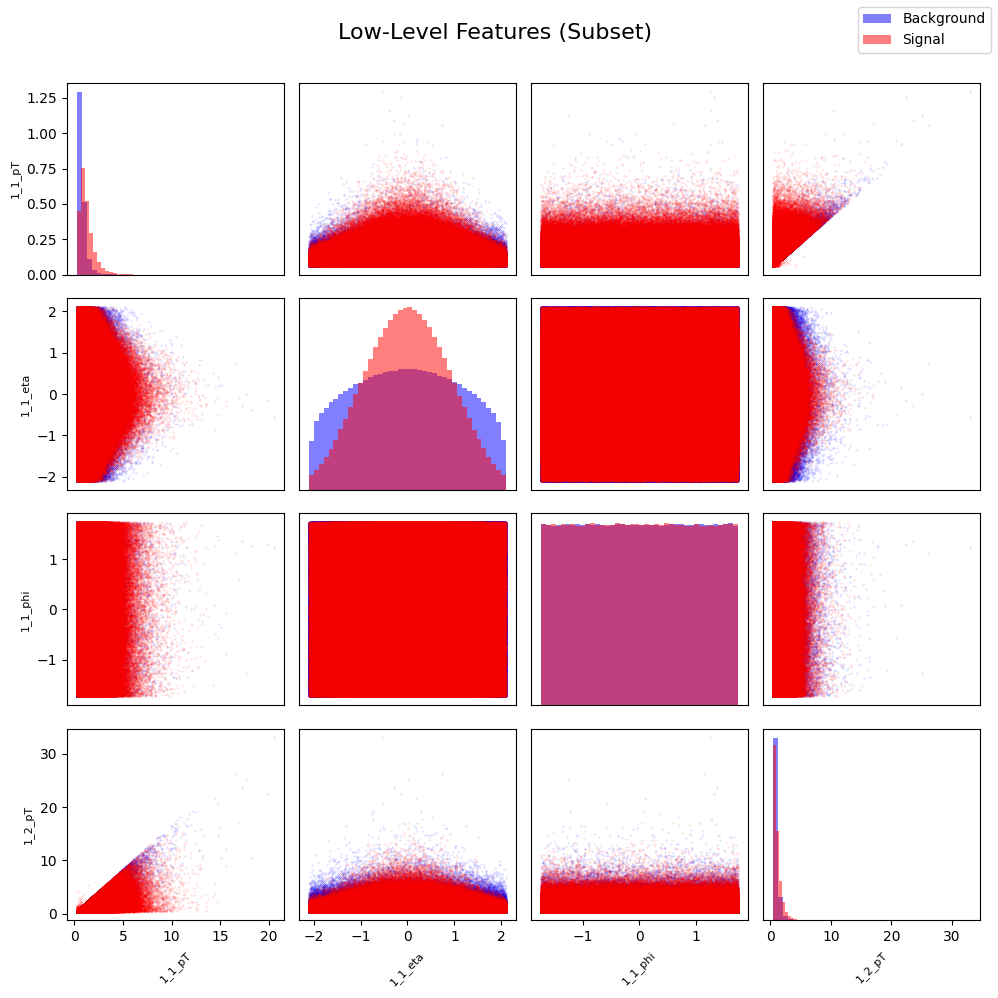

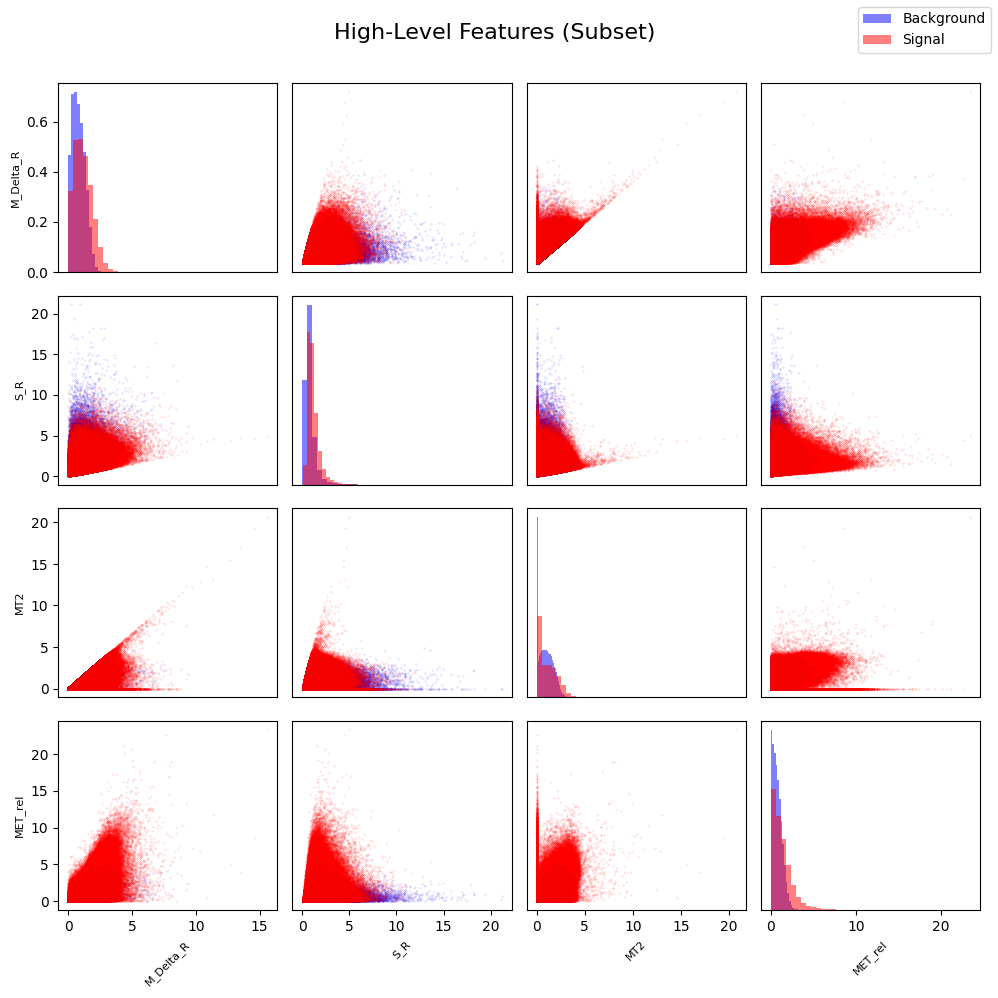

In [30]:
#Part a
# Function to generate pair plots

def pair_plot(data_sig, data_bkg, features, title="Pair Plot", bins=40):
    n = len(features)
    fig, axes = plt.subplots(n, n, figsize=(2.5 * n, 2.5 * n))
    fig.suptitle(title, fontsize=16)

    for i in range(n):
        for j in range(n):
            ax = axes[i, j]
            if i == j:
                # Diagonal: plot histograms
                ax.hist(data_bkg[features[i]], bins=bins, color='blue', alpha=0.5, density=True, label='Background')
                ax.hist(data_sig[features[i]], bins=bins, color='red', alpha=0.5, density=True, label='Signal')
            else:
                # Off-diagonal: plot scatter plots
                ax.plot(data_bkg[features[j]], data_bkg[features[i]], 'b.', markersize=0.5, alpha=0.3)
                ax.plot(data_sig[features[j]], data_sig[features[i]], 'r.', markersize=0.5, alpha=0.3)

            if i == n - 1:
                ax.set_xlabel(features[j], fontsize=8, rotation=45)
            else:
                ax.set_xticks([])
            if j == 0:
                ax.set_ylabel(features[i], fontsize=8)
            else:
                ax.set_yticks([])

    # Add legend to one of the subplots if available
    handles, labels = ax.get_legend_handles_labels()
    if handles:
        fig.legend(handles, labels, loc='upper right')

    plt.tight_layout(rect=[0, 0, 1, 0.97])
    plt.show()

# Plot low-level feature subset
pair_plot(df_sig[low_level[:4]], df_bkg[low_level[:4]], low_level[:4], title="Low-Level Features (Subset)")

# Plot high-level feature subset
pair_plot(df_sig[high_level[:4]], df_bkg[high_level[:4]], high_level[:4], title="High-Level Features (Subset)")


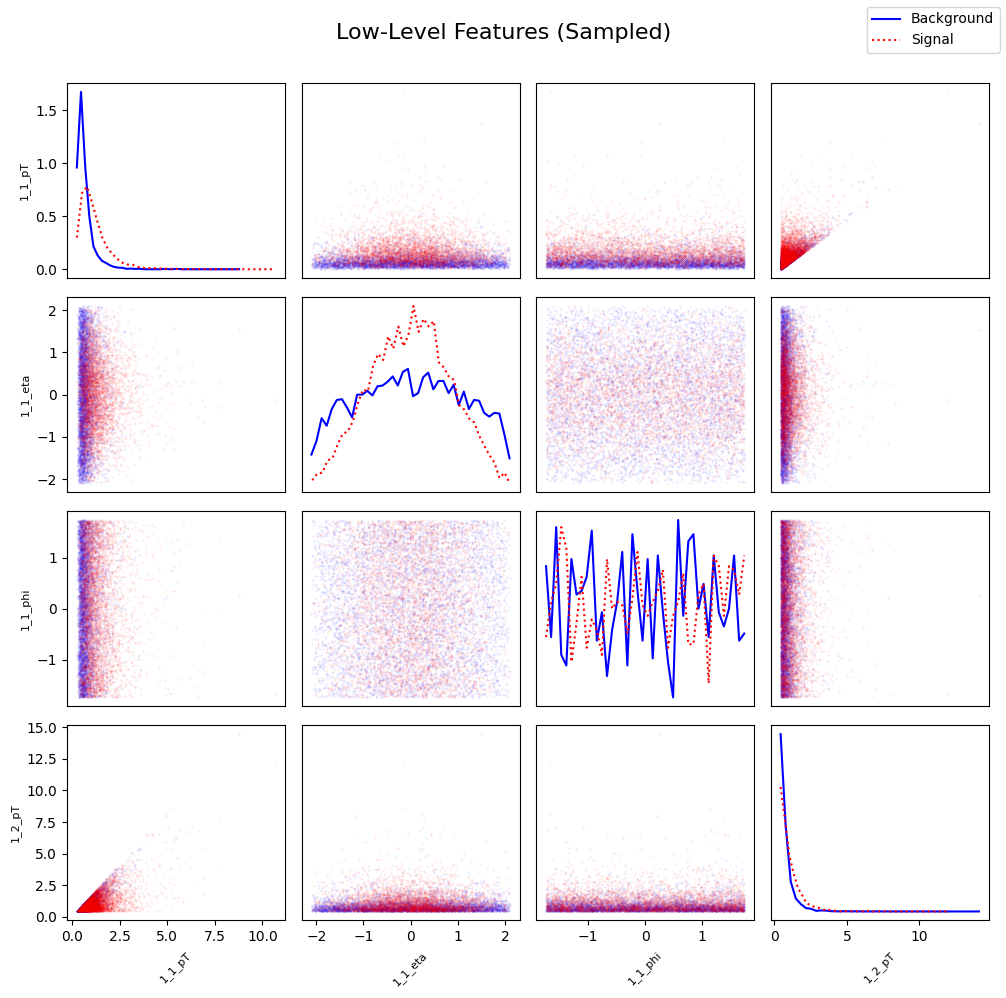

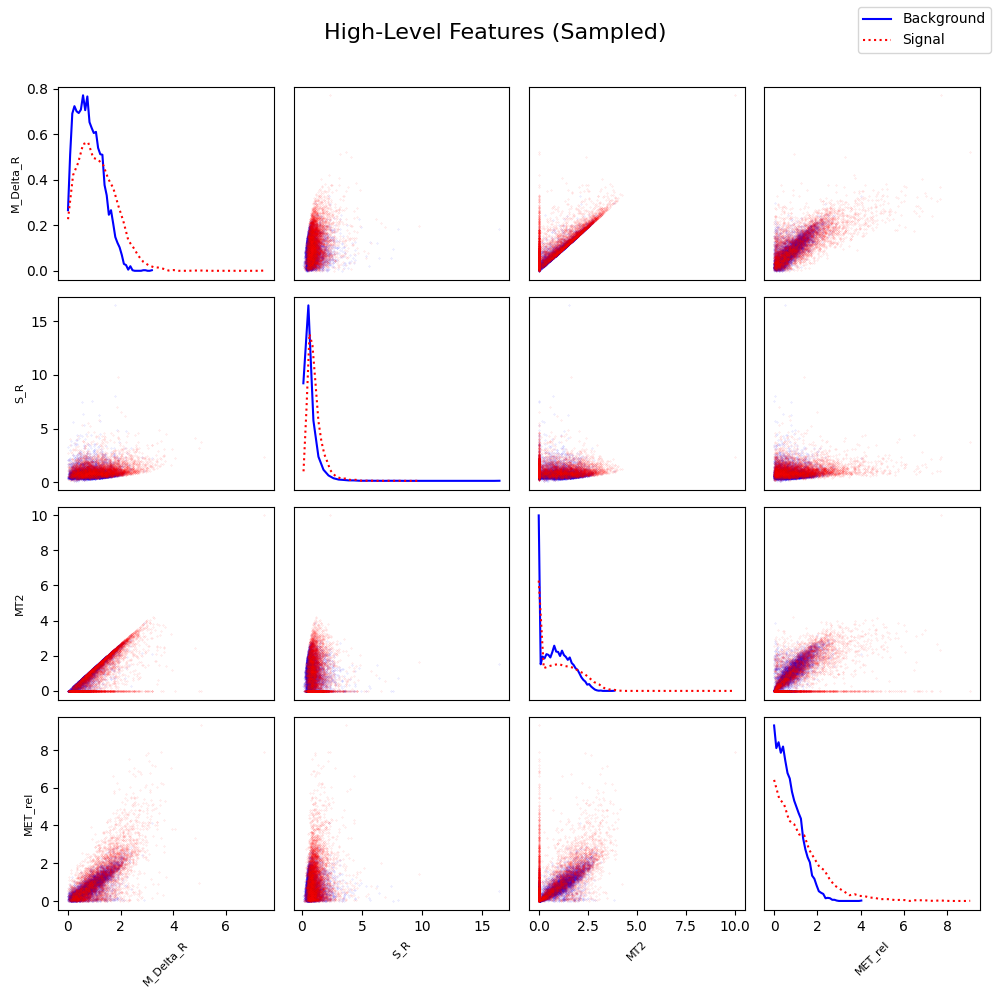

In [31]:
#Part b
# Optimized pair plot using sampling to speed up
def fast_pair_plot(data_sig, data_bkg, features, title="Optimized Pair Plot", bins=40, sample_size=5000):
    # Random sampling
    sig_sample = data_sig.sample(n=sample_size, random_state=42)
    bkg_sample = data_bkg.sample(n=sample_size, random_state=42)

    n = len(features)
    fig, axes = plt.subplots(n, n, figsize=(2.5 * n, 2.5 * n))
    fig.suptitle(title, fontsize=16)

    for i in range(n):
        for j in range(n):
            ax = axes[i, j]
            if i == j:
                # Diagonal: use np.histogram for faster plotting
                bkg_hist, bins_bkg = np.histogram(bkg_sample[features[i]], bins=bins, density=True)
                sig_hist, bins_sig = np.histogram(sig_sample[features[i]], bins=bins, density=True)

                ax.plot(bins_bkg[:-1], bkg_hist, color='blue', label='Background')
                ax.plot(bins_sig[:-1], sig_hist, color='red', linestyle='dotted', label='Signal')
            else:
                # Off-diagonal: plot scatter with alpha transparency
                ax.plot(bkg_sample[features[j]], bkg_sample[features[i]], 'b.', markersize=0.5, alpha=0.2)
                ax.plot(sig_sample[features[j]], sig_sample[features[i]], 'r.', markersize=0.5, alpha=0.2)

            # Label axes
            if i == n - 1:
                ax.set_xlabel(features[j], fontsize=8, rotation=45)
            else:
                ax.set_xticks([])
            if j == 0:
                ax.set_ylabel(features[i], fontsize=8)
            else:
                ax.set_yticks([])

    # Add legend
    handles, labels = ax.get_legend_handles_labels()
    if handles:
        fig.legend(handles, labels, loc='upper right')

    plt.tight_layout(rect=[0, 0, 1, 0.97])
    plt.show()

# Use it on subsets again
fast_pair_plot(df_sig[low_level[:4]], df_bkg[low_level[:4]], low_level[:4], title="Low-Level Features (Sampled)")

fast_pair_plot(df_sig[high_level[:4]], df_bkg[high_level[:4]], high_level[:4], title="High-Level Features (Sampled)")


In [32]:
#Part C
# Compute mean value of each variable for signal and background
mean_sig = df_sig[VarNames[1:]].mean()
mean_bkg = df_bkg[VarNames[1:]].mean()

# Calculate absolute difference of means
mean_diff = abs(mean_sig - mean_bkg)

# Sort differences in descending order
sorted_diff = mean_diff.sort_values(ascending=False)

# Print top 10 most discriminative features
print("Top 10 discriminative variables based on mean difference:\n")
print(sorted_diff.head(10))


Top 10 discriminative variables based on mean difference:

MET          0.768857
1_1_pT       0.534471
MET_rel      0.505263
M_TR_2       0.495986
M_Delta_R    0.341800
M_R          0.336500
S_R          0.321856
1_2_pT       0.255800
axial_MET    0.154960
MT2          0.136978
dtype: float32


### Exercise 4.2

#### Part a
Install [tabulate](https://github.com/astanin/python-tabulate).

#### Part b
Use numpy to compute the [covariance matrix](https://numpy.org/doc/stable/reference/generated/numpy.cov.html) and [correlation matrix](https://numpy.org/doc/stable/reference/generated/numpy.corrcoef.html) between all observabes, and separately between low and high-level features.

#### Part c
Use tabulate to create a well formatted table of the covariance and correlation matrices, with nice headings and appropriate significant figures. Embed the table into this notebook.

#### Part d
Write a function that takes a dataset and appropriate arguments and performs steps b and c.  

In [35]:
!pip install tabulate

In [36]:
#part b
import numpy as np
import pandas as pd

# Load the dataset
filename = "SUSY.csv"
VarNames = [
    "signal", "1_1_pT", "1_1_eta", "1_1_phi", "1_2_pT", "1_2_eta", "1_2_phi",
    "MET", "MET_phi", "MET_rel", "axial_MET", "M_R", "M_TR_2", "R", "MT2",
    "S_R", "M_Delta_R", "dPhi_r_b", "cos_theta_r1"
]
df = pd.read_csv(filename, dtype='float32', names=VarNames)

# Remove the label column ("signal") for correlation/covariance analysis
observables = df.drop(columns=["signal"])

# Define low-level and high-level features
low_level = ["1_1_pT", "1_1_eta", "1_1_phi", "1_2_pT", "1_2_eta", "1_2_phi", "MET", "MET_phi"]
high_level = list(set(observables.columns) - set(low_level))

# Convert feature sets to NumPy arrays
X_all = observables.values.T
X_low = df[low_level].values.T
X_high = df[high_level].values.T

# Compute covariance and correlation matrices using numpy
cov_all = np.cov(X_all)
corr_all = np.corrcoef(X_all)

cov_low = np.cov(X_low)
corr_low = np.corrcoef(X_low)

cov_high = np.cov(X_high)
corr_high = np.corrcoef(X_high)

# Also keep variable names in the same order
low_names = low_level
high_names = high_level
all_names = observables.columns.tolist()


In [43]:
# Part c - Step 1: Display function

from IPython.display import HTML, display
from tabulate import tabulate

# Utility function to convert matrix to nicely formatted HTML table
def display_matrix(matrix, headers, title="Matrix", floatfmt=".3f"):
    """
    Display a covariance or correlation matrix as a tabulated HTML table.

    Args:
        matrix (np.ndarray): 2D covariance or correlation matrix.
        headers (list): List of column and row headers.
        title (str): Title to display above the table.
        floatfmt (str): Format for floating-point values.
    """
    # Round matrix values
    matrix_rounded = np.round(matrix, 3)

    # Add row labels to each row
    table_with_labels = [[row_label] + list(row) for row_label, row in zip(headers, matrix_rounded)]

    # Display title and table using tabulate
    print(f"\n{title}")
    display(HTML(tabulate(table_with_labels, headers=[""] + headers, tablefmt="html")))


In [44]:
# Part d
# Function to compute and display covariance and correlation matrices
def summarize_cov_corr(df, features, title_prefix=""):
    """
    Compute and display covariance and correlation matrices
    using tabulate with appropriate formatting.

    Parameters:
    - df: DataFrame
    - features: list of feature names
    - title_prefix: optional string to prefix the table titles
    """
    # Select only the relevant features
    data = df[features].to_numpy().T  # shape: (features, samples)

    # Compute matrices using numpy
    cov_matrix = np.cov(data)
    corr_matrix = np.corrcoef(data)

    # Round values for cleaner presentation
    cov_rounded = np.round(cov_matrix, 3)
    corr_rounded = np.round(corr_matrix, 3)

    # Generate tables
    headers = [""] + features
    cov_table = [[features[i]] + list(cov_rounded[i]) for i in range(len(features))]
    corr_table = [[features[i]] + list(corr_rounded[i]) for i in range(len(features))]

    # Display formatted tables
    display(HTML(f"<h3>{title_prefix} Covariance Matrix</h3>"))
    display(HTML(tabulate(cov_table, headers=headers, tablefmt='html')))

    display(HTML(f"<h3>{title_prefix} Correlation Matrix</h3>"))
    display(HTML(tabulate(corr_table, headers=headers, tablefmt='html')))

# Summarize low-level features
low_level_features = ["1_1_pT", "1_1_eta", "1_1_phi", "1_2_pT", "1_2_eta", "1_2_phi", "MET", "MET_phi"]
summarize_cov_corr(df, low_level_features, title_prefix="Low-Level Features")


# Summarize high-level features
high_level_features = list(set(VarNames[1:]) - set(low_level_features))
summarize_cov_corr(df, high_level_features, title_prefix="High-Level Features")

# Summarize all features (if desired)
all_features = VarNames[1:]  # exclude 'signal'
summarize_cov_corr(df, all_features, title_prefix="All Features")



,1_1_pT,1_1_eta,1_1_phi,1_2_pT,1_2_eta,1_2_phi,MET,MET_phi
1_1_pT,0.472,-0,-0,0.308,-0,0,0.231,-0.001
1_1_eta,-0,1.006,0,-0,0.406,0,-0.001,-0.001
1_1_phi,-0,0,1.003,-0,0.001,-0.268,0.001,-0.184
1_2_pT,0.308,-0,-0,0.428,-0,0,0.08,-0.001
1_2_eta,-0,0.406,0.001,-0,1.006,-0,0,-0
1_2_phi,0,0,-0.268,0,-0,1.003,0,-0.034
MET,0.231,-0.001,0.001,0.08,0,0,0.762,-0.002
MET_phi,-0.001,-0.001,-0.184,-0.001,-0,-0.034,-0.002,1.003


,1_1_pT,1_1_eta,1_1_phi,1_2_pT,1_2_eta,1_2_phi,MET,MET_phi
1_1_pT,1,-0,-0,0.685,-0,0,0.385,-0.001
1_1_eta,-0,1,0,-0.001,0.403,0,-0.001,-0.001
1_1_phi,-0,0,1,-0,0.001,-0.267,0.001,-0.184
1_2_pT,0.685,-0.001,-0,1,-0.001,0,0.14,-0.002
1_2_eta,-0,0.403,0.001,-0.001,1,-0,0,-0
1_2_phi,0,0,-0.267,0,-0,1,0,-0.034
MET,0.385,-0.001,0.001,0.14,0,0,1,-0.002
MET_phi,-0.001,-0.001,-0.184,-0.002,-0,-0.034,-0.002,1


,M_Delta_R,S_R,MT2,MET_rel,axial_MET,R,M_R,M_TR_2,dPhi_r_b,cos_theta_r1
M_Delta_R,0.389,0.096,0.433,0.416,-0.234,0.166,0.074,0.242,0.042,0.039
S_R,0.096,0.385,-0.011,0.082,-0.043,-0.083,0.383,0.23,-0.004,-0.01
MT2,0.433,-0.011,0.738,0.41,-0.46,0.232,-0.037,0.189,0.021,0.045
MET_rel,0.416,0.082,0.41,0.792,-0.125,0.25,0.044,0.303,0.147,0.056
axial_MET,-0.234,-0.043,-0.46,-0.125,1.003,-0.182,0.015,-0.189,-0.026,-0.054
R,0.166,-0.083,0.232,0.25,-0.182,0.222,-0.113,0.104,0.087,0.058
M_R,0.074,0.383,-0.037,0.044,0.015,-0.113,0.395,0.212,-0.029,-0.014
M_TR_2,0.242,0.23,0.189,0.303,-0.189,0.104,0.212,0.341,0.058,0.052
dPhi_r_b,0.042,-0.004,0.021,0.147,-0.026,0.087,-0.029,0.058,0.19,0.009
cos_theta_r1,0.039,-0.01,0.045,0.056,-0.054,0.058,-0.014,0.052,0.009,0.039


,M_Delta_R,S_R,MT2,MET_rel,axial_MET,R,M_R,M_TR_2,dPhi_r_b,cos_theta_r1
M_Delta_R,1,0.248,0.808,0.749,-0.375,0.564,0.189,0.666,0.156,0.319
S_R,0.248,1,-0.021,0.149,-0.07,-0.285,0.981,0.636,-0.013,-0.084
MT2,0.808,-0.021,1,0.536,-0.535,0.574,-0.068,0.378,0.056,0.263
MET_rel,0.749,0.149,0.536,1,-0.141,0.595,0.078,0.583,0.378,0.317
axial_MET,-0.375,-0.07,-0.535,-0.141,1,-0.385,0.024,-0.323,-0.06,-0.274
R,0.564,-0.285,0.574,0.595,-0.385,1,-0.381,0.38,0.424,0.627
M_R,0.189,0.981,-0.068,0.078,0.024,-0.381,1,0.578,-0.106,-0.115
M_TR_2,0.666,0.636,0.378,0.583,-0.323,0.38,0.578,1,0.228,0.451
dPhi_r_b,0.156,-0.013,0.056,0.378,-0.06,0.424,-0.106,0.228,1,0.106
cos_theta_r1,0.319,-0.084,0.263,0.317,-0.274,0.627,-0.115,0.451,0.106,1


,1_1_pT,1_1_eta,1_1_phi,1_2_pT,1_2_eta,1_2_phi,MET,MET_phi,MET_rel,axial_MET,M_R,M_TR_2,R,MT2,S_R,M_Delta_R,dPhi_r_b,cos_theta_r1
1_1_pT,0.472,-0,-0,0.308,-0,0,0.231,-0.001,0.099,-0.013,0.368,0.291,-0.059,-0.013,0.346,0.098,-0.047,0.023
1_1_eta,-0,1.006,0,-0,0.406,0,-0.001,-0.001,-0,-0,-0,-0,0,-0,-0,-0.001,0,0
1_1_phi,-0,0,1.003,-0,0.001,-0.268,0.001,-0.184,0.002,-0.002,-0,0.001,0.001,0.002,0,0.001,0.001,0
1_2_pT,0.308,-0,-0,0.428,-0,0,0.08,-0.001,-0.002,0.05,0.328,0.164,-0.099,-0.069,0.325,0.006,-0.004,-0.028
1_2_eta,-0,0.406,0.001,-0,1.006,-0,0,-0,0,-0,-0.001,-0,0,-0,-0.001,-0,-0,0
1_2_phi,0,0,-0.268,0,-0,1.003,0,-0.034,0,-0,0,0,0,0.001,0,0,0,-0
MET,0.231,-0.001,0.001,0.08,0,0,0.762,-0.002,0.548,0.145,0.146,0.368,0.189,0.156,0.167,0.317,0.145,0.073
MET_phi,-0.001,-0.001,-0.184,-0.001,-0,-0.034,-0.002,1.003,-0.003,-0.001,-0.001,-0.001,-0,0.001,-0.001,-0,-0.001,0
MET_rel,0.099,-0,0.002,-0.002,0,0,0.548,-0.003,0.792,-0.125,0.044,0.303,0.25,0.41,0.082,0.416,0.147,0.056
axial_MET,-0.013,-0,-0.002,0.05,-0,-0,0.145,-0.001,-0.125,1.003,0.015,-0.189,-0.182,-0.46,-0.043,-0.234,-0.026,-0.054


,1_1_pT,1_1_eta,1_1_phi,1_2_pT,1_2_eta,1_2_phi,MET,MET_phi,MET_rel,axial_MET,M_R,M_TR_2,R,MT2,S_R,M_Delta_R,dPhi_r_b,cos_theta_r1
1_1_pT,1,-0,-0,0.685,-0,0,0.385,-0.001,0.161,-0.018,0.852,0.724,-0.183,-0.022,0.812,0.229,-0.157,0.166
1_1_eta,-0,1,0,-0.001,0.403,0,-0.001,-0.001,-0.001,-0,-0,-0,0,-0,-0,-0.001,0,0.001
1_1_phi,-0,0,1,-0,0.001,-0.267,0.001,-0.184,0.002,-0.002,-0,0.001,0.002,0.002,0,0.002,0.002,0.002
1_2_pT,0.685,-0.001,-0,1,-0.001,0,0.14,-0.002,-0.004,0.076,0.798,0.43,-0.322,-0.123,0.799,0.014,-0.014,-0.216
1_2_eta,-0,0.403,0.001,-0.001,1,-0,0,-0,0,-0,-0.001,-0,0.001,-0,-0.001,-0,-0,0.001
1_2_phi,0,0,-0.267,0,-0,1,0,-0.034,0,-0,0,0,0,0.001,0.001,0.001,0.001,-0.001
MET,0.385,-0.001,0.001,0.14,0,0,1,-0.002,0.706,0.166,0.266,0.722,0.459,0.209,0.309,0.581,0.382,0.426
MET_phi,-0.001,-0.001,-0.184,-0.002,-0,-0.034,-0.002,1,-0.003,-0.001,-0.002,-0.001,-0,0.001,-0.002,-0.001,-0.003,0
MET_rel,0.161,-0.001,0.002,-0.004,0,0,0.706,-0.003,1,-0.141,0.078,0.583,0.595,0.536,0.149,0.749,0.378,0.317
axial_MET,-0.018,-0,-0.002,0.076,-0,-0,0.166,-0.001,-0.141,1,0.024,-0.323,-0.385,-0.535,-0.07,-0.375,-0.06,-0.274


Hint: Example code for embedding a `tabulate` table into a notebook:

In [34]:
from IPython.display import HTML, display
import tabulate
table = [["A",1,2],
        ["C",3,4],
        ["D",5,6]]
display(HTML(tabulate.tabulate(table, tablefmt='html', headers=["X","Y","Z"])))

X,Y,Z
A,1,2
C,3,4
D,5,6


## Exercise 5: Selection

### Exercise 5.1

Part a
By looking at the signal/background distributions for each observable (e.g. $x$) determine which selection criteria would be optimal:

1. $x > x_c$
2. $x < x_c$
3. $|x - \mu| > x_c$
4. $|x - \mu| < x_c$

where $x_c$ is value to be determined below.

### Exercise 5.2

Plot the True Positive Rate (TPR) (aka signal efficiency $\epsilon_S(x_c)$) and False Positive Rate (FPR) (aka background efficiency $\epsilon_B(x_c)$) as function of $x_c$ for applying the strategy in part a to each observable.

### Exercise 5.3
Assume 3 different scenarios corresponding to different numbers of signal and background events expected in data:

1. Expect $N_S=10$, $N_B=100$.
1. Expect $N_S=100$, $N_B=1000$.
1. Expect $N_S=1000$, $N_B=10000$.
1. Expect $N_S=10000$, $N_B=100000$.

Plot the significance ($\sigma_{S'}$) for each observable as function of $x_c$ for each scenario, where

$\sigma_{S'}= \frac{N'_S}{\sqrt{N'_S+N'_B}}$

and $N'_{S,B} = \epsilon_{S,B}(x_c) * N_{S,B}$.

## Exercise 6: Cut Flow


### Exercise 6.1

For each above scenario, choose a subset (minumum 3) of observables to use for selections, and values of $x_c$ based on your significance plots (part 3c).

### Exercise 6.2
Create a "cut-flow" table for each scenario where you successively make the selections on each observable and tabulate $\epsilon_S$, $\epsilon_B$, $N'_S$, $N'_B$, and $\sigma_{S'}$.

### Exercise 6.3
In 3c above you computed the significance for each observable assuming to make no other selections on any other observable. If the variables are correlated, then this assumption can lead to non-optimial results when selecting on multiple variables. By looking at the correlation matrices and your answers to 4b, identify where this effect could be most detrimental to the significance. Attempt to correct the issue by applying the selection in one observable and then optimizing (part 3c) for a second observable. What happens if you change the order of your selection (make selection on second and optimize on first)?




## Exercise 7: ROC Curves

### Exercise 7.1
For the top 3 observables you identified earlier, create one figure overlaying the Reciever Operating Characteristic (ROC) curves for the 3 observables. Compute the area under the curves and report it in the legend of the figure.

### Exercise 7.2
Write a function that you can use to quickly create the figure in part a with other observables and different conditions. Note that you will likely revise this function as you do the remainder of the lab.

### Exercise 7.3
Use the function from part b to compare the ROC curves for the successive selections in lab 3, exercise 4. Specifically, plot the ROC curve after each selection.

### Exercise 7.4
Use your function and appropriate example to demonstrate the effect (if any) of changing order of the successive selections.



## Exercise 8: Linear Discriminant

### Exercise 8.1

Using numpy, compute the between-class $\bf{S}_B$ and within-class $\bf{S}_W$ covariance matrices defined as:

$$
\bf{S}_B = (\bf{m_2}-\bf{m_1})(\bf{m_2}-\bf{m_1})^T \\
$$
$$
\bf{S}_W = \sum_{i=1,2} \sum_{n=1}^{l_i} (\bf{x}_n^i - \bf{m}_i) (\bf{x}_n^i - \bf{m}_i)^T
$$

where $\bf{m_i}$ are the vectors containing the means for category 1 and 2, here defined as signal and background. Here $\bf{x}_n^i$ is the vector containing the observables for the $n$th example event in category $i$.

### Exercise 8.1

Compute the linear coefficients $\bf{w} = \bf{S_W}^{-1}(\bf{m_2}-\bf{m_1})$. Compare the histogram of the distribution of $F_n^i=\bf{w}^T\bf{x}_n^i$ for the two categories.

### Exercise 8.1

Draw the ROC curve for $F_n$.

### Exercise 8.1

What is the maximal significance you can obtain in the scenarios in exercise 5?